In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar10
import pickle
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sn

In [3]:
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
test_x = test_x.astype('float32')
test_x = (test_x - 127.5) / 127.5
classes = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [22]:
def plot_graphs(history):
    h = pickle.load(open(history, 'rb'))
    
    losses = h['loss']
    val_losses = h['val_loss']
    val_accs = h['val_sparse_categorical_accuracy']
    accs = h['sparse_categorical_accuracy']

    plt.plot(range(0,len(losses)), losses, label='loss')
    plt.plot(range(0,len(val_losses)), val_losses, label='val_loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.ylim(bottom=0)
    plt.legend()
    plt.show()
    
    plt.plot(range(0,len(accs)), accs, label='accuracy')
    plt.plot(range(0,len(val_accs)), val_accs, label='val_accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.ylim(bottom=0)
    plt.legend()
    plt.show()

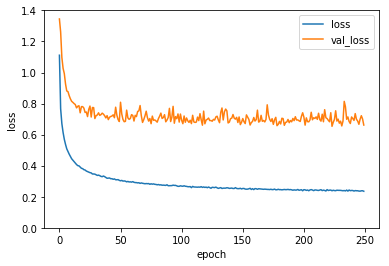

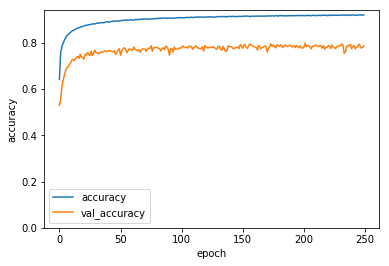

In [23]:
plot_graphs('BaseClf_fake2.p')

# ACGAN

## S1

In [24]:
discriminator = load_model('./BaseClf.h5')
_eval = discriminator.evaluate(test_x, test_y)
predictions = discriminator.predict(test_x)
predictions = [np.argmax(p) for p in predictions]
labels = np.reshape(test_y, (len(predictions)))

313/313 [==============================] - 1s 2ms/step - loss: 0.6953 - sparse_categorical_accuracy: 0.7853


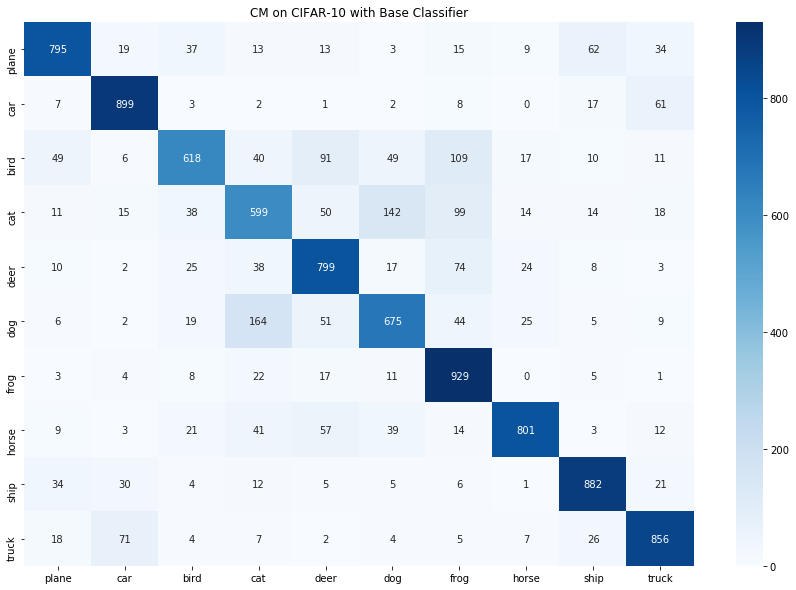

In [25]:
cm = tf.math.confusion_matrix(labels, predictions, num_classes=10)
plt.figure(figsize=(15,10))
plt.title('CM on CIFAR-10 with Base Classifier')
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=classes, yticklabels=classes)

## S2-StyleGAN2

In [26]:
discriminator = load_model('./BaseClf_fake.h5')
_eval = discriminator.evaluate(test_x, test_y)
predictions = discriminator.predict(test_x)
predictions = [np.argmax(p) for p in predictions]
labels = np.reshape(test_y, (len(predictions)))

313/313 [==============================] - 1s 2ms/step - loss: 0.6168 - sparse_categorical_accuracy: 0.7957


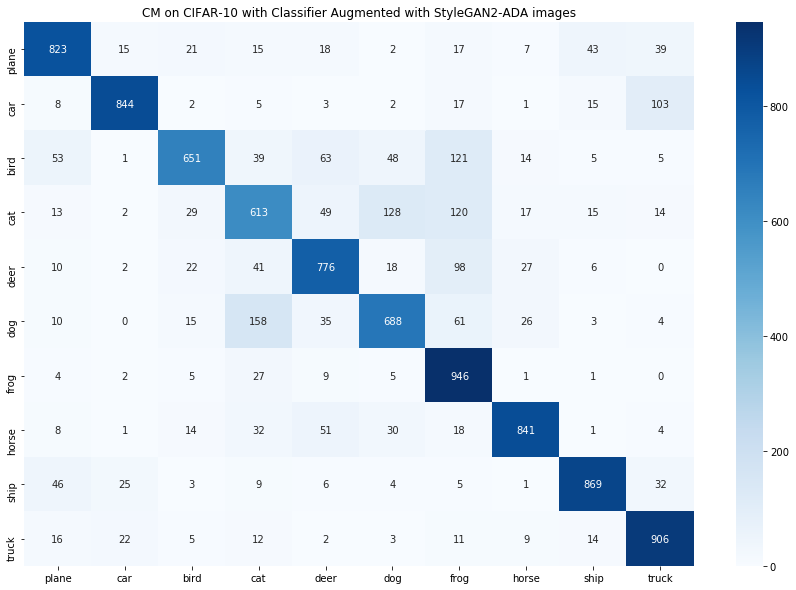

In [27]:
cm = tf.math.confusion_matrix(labels, predictions, num_classes=10)
plt.figure(figsize=(15,10))
plt.title('CM on CIFAR-10 with Classifier Augmented with StyleGAN2-ADA images')
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=classes, yticklabels=classes)

## S2-ACGAN(generator from S3)

In [28]:
discriminator = load_model('./BaseClf_fake2.h5')
_eval = discriminator.evaluate(test_x, test_y)
predictions = discriminator.predict(test_x)
predictions = [np.argmax(p) for p in predictions]
labels = np.reshape(test_y, (len(predictions)))

313/313 [==============================] - 1s 2ms/step - loss: 0.7123 - sparse_categorical_accuracy: 0.7731


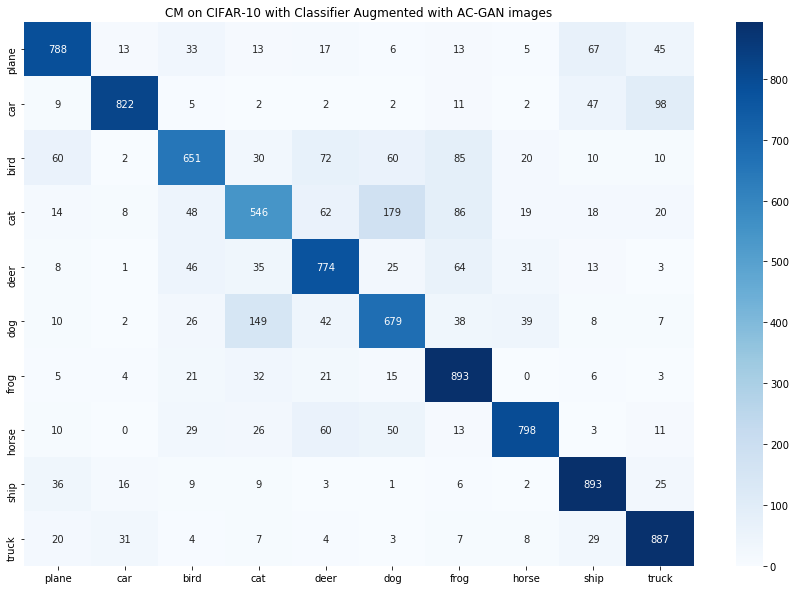

In [29]:
cm = tf.math.confusion_matrix(labels, predictions, num_classes=10)
plt.figure(figsize=(15,10))
plt.title('CM on CIFAR-10 with Classifier Augmented with AC-GAN images')
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=classes, yticklabels=classes)

## S3

In [6]:
#measure accuracy on CIFAR10 test data
discriminator = '../../ACGAN/history/acgan/acgan-cifar10-12/training_checkpoints/discriminator-e250.h5'
discriminator = load_model(discriminator)
_eval = discriminator.evaluate(test_x, test_y)
_, predictions = discriminator.predict(test_x)
predictions = [np.argmax(p) for p in predictions]
labels = np.reshape(test_y, (len(predictions)))

313/313 [==============================] - 1s 3ms/step - loss: 2.1496 - out_fake_loss: 1.5044 - out_aux_loss: 0.6452 - out_fake_accuracy: 0.1087 - out_aux_out_aux_sparse_categorical_accuracy: 0.7932


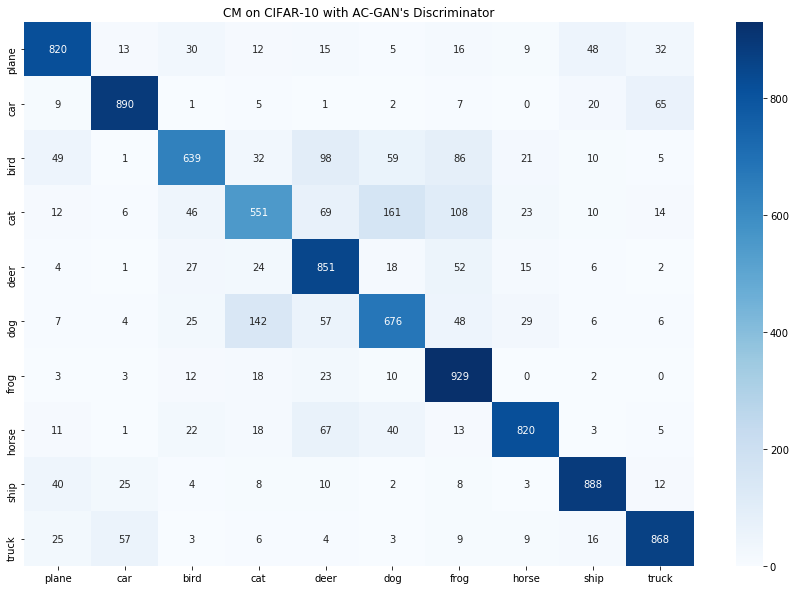

In [31]:
cm = tf.math.confusion_matrix(labels, predictions, num_classes=10)
plt.figure(figsize=(15,10))
plt.title('CM on CIFAR-10 with AC-GAN\'s Discriminator')
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=classes, yticklabels=classes)